# Distribution of Curve Numbers

In [3]:
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt

# # load landuse and surficial geology indices
# lufp = "C:/Users/mm/Documents/dat/shp/solrisv3_10_infilled_50.bil"
# sgfp = "C:/Users/mm/Documents/dat/shp/OGSsurfGeo_50.bil"
# outfp = "C:/Users/mm/Documents/dat/shp/CN_50.bil"
# nr, nc = 5000, 5000
lufp = "M:/MadRiver23/build/lusg/solrisv3_10_infilled-50_resmpl.bil"
sgfp = "M:/MadRiver23/build/lusg/OGSsurfGeo_50_resmpl.bil"
outfp = "M:/MadRiver23/build/lusg/solrisv3_10_infilled-scscn.bil"
nr, nc = 634, 822

### Functions

In [14]:
# Builds CN raster on the basis of landuse ID and surficial geology
# HARD CODED CN table cross-reference
lucn = {11: [77,86,91,94],
        21: [77,86,91,94],
        23: [77,86,91,94],
        41: [77,86,91,94],
        43: [77,86,91,94],
        51: [77,86,91,94],
        52: [77,86,91,94],
        53: [77,86,91,94],
        64: [77,86,91,94],
        65: [43,65,76,82],
        81: [30,58,71,78],
        82: [30,58,71,78],
        83: [30,58,71,78],
        90: [36,60,73,79],
        91: [36,60,73,79],
        92: [36,60,73,79],
        93: [36,60,73,79],
        131: [39,61,74,80],
        135: [39,61,74,80],
        140: [39,61,74,80],
        150: [39,61,74,80],
        160: [39,61,74,80],
        170: [98,98,98,98],
        191: [36,60,73,79],
        192: [36,60,73,79],
        193: [67,78,85,89],
        201: [98,98,98,98],
        202: [49,69,79,84],
        203: [98,98,98,98],
        204: [98,98,98,98],
        205: [98,98,98,98],
        250: [67,78,85,89]}
        # -9999: [0,0,0,0]}
        
def buildCN(lu, hsg):
    # create arrays for each soil group
    lA = np.vectorize({k:v[0] for k,v in lucn.items()}.get)(lu)
    lB = np.vectorize({k:v[1] for k,v in lucn.items()}.get)(lu)
    lC = np.vectorize({k:v[2] for k,v in lucn.items()}.get)(lu)
    lD = np.vectorize({k:v[3] for k,v in lucn.items()}.get)(lu)

    a = np.where(hsg=='A', lA,
                 np.where(hsg=='B', lB,
                          np.where(hsg=='C', lC,
                                   np.where(hsg=='D', lD, np.nan))))
    
    return a.astype(np.float32) # a.astype(np.uint16)

In [37]:
# Preview input rasters
# https://geohackweek.github.io/raster/04-workingwithrasters/
def plotRasterFile(fp, name):
    with rasterio.open(fp) as src:
        print(name)
        print(src.profile)
        ndarray = src.read(1, out_shape=(1, int(src.height), int(src.width)))
        # ndarray = ndarray.astype('f4')
        # ndarray[ndarray==src.nodata] = np.nan
        # ndarray[ndarray==-9999] = np.nan
        ndarray = ndarray.astype('i4')
        ndarray[ndarray==-9999] = 0

    plt.imshow(ndarray)
    plt.colorbar()
    plt.title('{}  {}'.format(name, ndarray.shape))
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()

### Preview
Load rasters

In [5]:
l = np.fromfile(lufp, np.int32).reshape(nr,nc)
g = np.fromfile(sgfp, np.int32).reshape(nr,nc)

#### SOLRIS 3.0, land use ID

SOLRIS 3.0
{'driver': 'EHdr', 'dtype': 'uint32', 'nodata': None, 'width': 822, 'height': 634, 'count': 1, 'crs': CRS.from_epsg(26917), 'transform': Affine(50.0, 0.0, 546200.0,
       0.0, -50.0, 4916350.0), 'blockysize': 1, 'tiled': False}


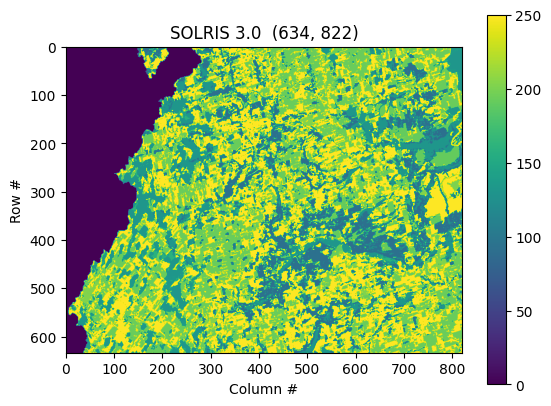

In [38]:
plotRasterFile(lufp, 'SOLRIS 3.0')

#### OGS Surficial Geology

OGS Surficial Geology
{'driver': 'EHdr', 'dtype': 'uint32', 'nodata': None, 'width': 822, 'height': 634, 'count': 1, 'crs': CRS.from_epsg(26917), 'transform': Affine(50.0, 0.0, 546200.0,
       0.0, -50.0, 4916350.0), 'blockysize': 1, 'tiled': False}


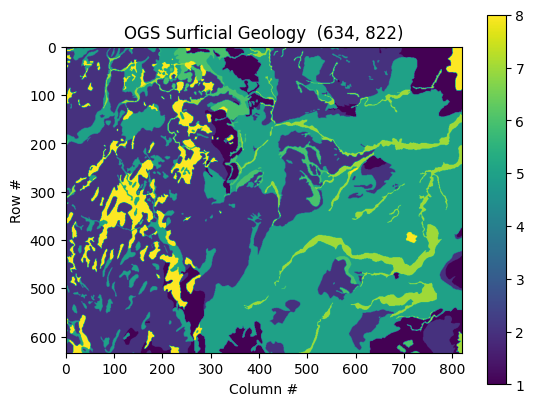

In [39]:
plotRasterFile(sgfp, 'OGS Surficial Geology')

#### Curve Numbes

First map OGS's permeabilty qualifiers (low, medium-low, etc.) to 1 of 4 "hydrologic soil groups" (A, B, C and D) common to CN lookup tables.

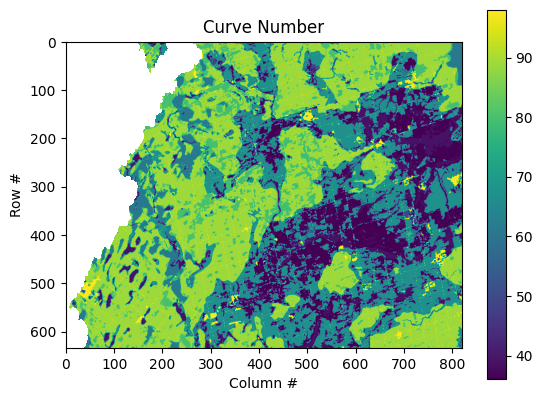

In [15]:
hsg = {1: 'D', 2: 'D', 3: 'C', 4: 'B', 5: 'A', 6: 'D', 7: 'A', 8: 'B'} # hydrologic soil group
gk = np.vectorize(hsg.get)(g)

gcn = buildCN(l,gk)

plt.imshow(gcn)
plt.colorbar()
plt.title('Curve Number')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

### Save to raster

> *will output an *.npy file. change extension to .bil*

In [18]:
gcn.tofile(outfp)